In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

In [5]:
# Step 1: Load and unify the cleaned datasets
df_benin = pd.read_csv('./../data/benin-malanville_clean.csv')
df_sierraleone = pd.read_csv('./../data/sierraleone-bumbuna_clean.csv')
df_togo = pd.read_csv('./../data/togo-depaong_clean.csv')

In [6]:

# Standardize column names
df_benin.columns = df_benin.columns.str.upper()
df_sierraleone.columns = df_sierraleone.columns.str.upper()
df_togo.columns = df_togo.columns.str.upper()

In [7]:
# Add country labels
df_benin['COUNTRY'] = 'Benin'
df_sierraleone['COUNTRY'] = 'Sierra Leone'
df_togo['COUNTRY'] = 'Togo'

# Combine all into one DataFrame
all_data = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)
print(all_data.describe())
print(all_data.shape)
print(all_data.head())  # First few rows
print(all_data.tail()) #Last few rows

                GHI           DNI           DHI          MODA          MODB  \
count  1.576798e+06  1.576798e+06  1.576798e+06  1.576798e+06  1.576798e+06   
mean   4.226297e+02  1.591568e+02  1.539345e+02  2.196442e+02  2.124176e+02   
std    2.265166e+02  2.336762e+02  1.511598e+02  3.120953e+02  3.018876e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.595000e+02  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    4.303000e+02  2.850000e+01  1.522000e+02  4.100000e+00  3.900000e+00   
75%    4.303000e+02  2.021000e+02  2.250000e+02  3.993000e+02  3.866000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               TAMB            RH            WS        WSGUST       WSSTDEV  \
count  1.576798e+06  1.576798e+06  1.576798e+06  1.576798e+06  1.576798e+06   
mean   2.727433e+01  6.315835e+01  1.960768e+00  2.716863e+00  4.931008e-01   
std    4.690171e+00  2.872629e+01  1.506654e+00  1.

C:\Users\tsega\AppData\Local\Temp\ipykernel_42084\3190572139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='COUNTRY', y=metric, data=all_data, palette='Set2')


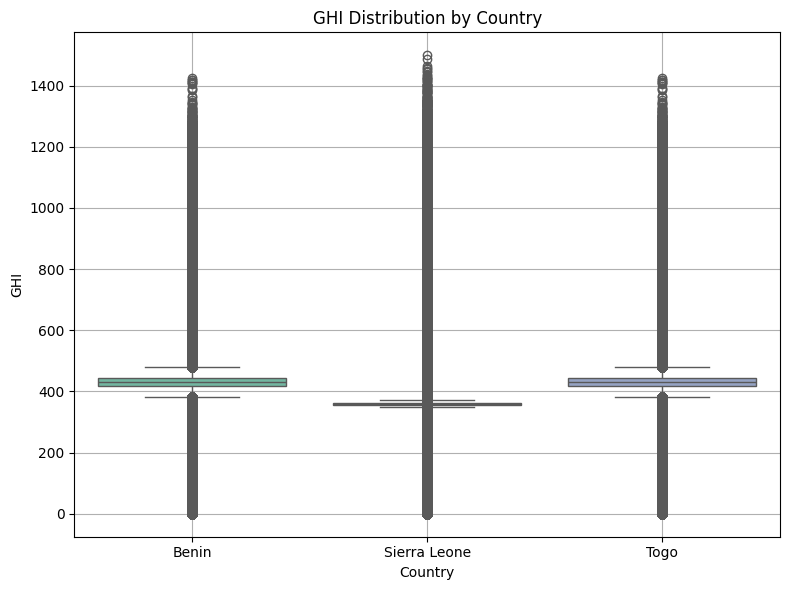

C:\Users\tsega\AppData\Local\Temp\ipykernel_42084\3190572139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='COUNTRY', y=metric, data=all_data, palette='Set2')


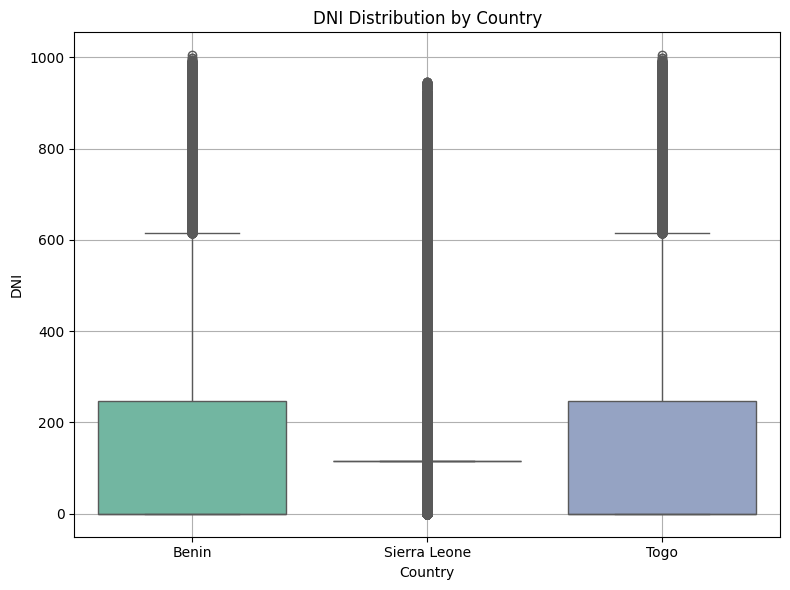

C:\Users\tsega\AppData\Local\Temp\ipykernel_42084\3190572139.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='COUNTRY', y=metric, data=all_data, palette='Set2')


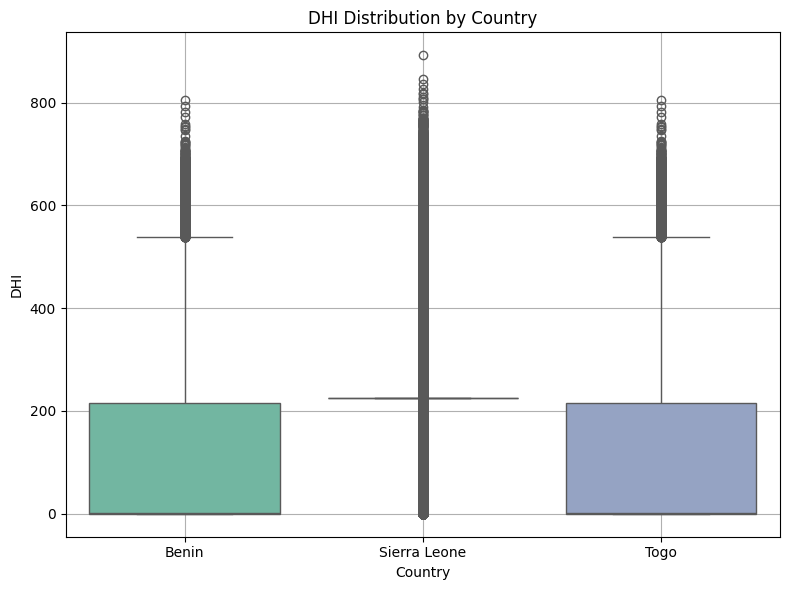

In [8]:

# Step 2: Generate comparative boxplots for GHI, DNI, DHI
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='COUNTRY', y=metric, data=all_data, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:

# Step 3: Compute summary statistics (mean, median, std)

summary = all_data.groupby('COUNTRY')[metrics].agg(['mean', 'median', 'std']).round(2)
print("Summary Table (Mean, Median, Std):")
print(summary)
 #Save to file
summary.to_csv('./../data/summary_statistics_by_country.csv')

Summary Table (Mean, Median, Std):
                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
COUNTRY                                                                     
Benin         442.44  430.3  228.26  151.26    0.0  250.96  116.44    2.5   
Sierra Leone  383.02  359.5  217.65  174.95  115.3  193.60  228.91  225.0   
Togo          442.44  430.3  228.26  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
COUNTRY               
Benin         156.52  
Sierra Leone  105.44  
Togo          156.52  


In [10]:
ghi_benin = all_data[all_data['COUNTRY'] == 'Benin']['GHI'].dropna()
ghi_sierra = all_data[all_data['COUNTRY'] == 'Sierra Leone']['GHI'].dropna()
ghi_togo = all_data[all_data['COUNTRY'] == 'Togo']['GHI'].dropna()


In [11]:
f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("One-way ANOVA p-value:", p_value)

One-way ANOVA p-value: 0.0


since the p-value is less than 0.05 ther is a significant difference in GHI means between at least two countries.

tatistical Summary of Solar Irradiance Metrics by Country
Mean GHI (Global Horizontal Irradiance)
Benin: Mean GHI ranges between 450 and 500 W/m².

Sierra Leone: Mean GHI ranges between 350 and 400 W/m².

Togo: Mean GHI is approximately 430 to 440 W/m².

Mean DHI (Diffuse Horizontal Irradiance)
Benin: Mean DHI falls between 190 and 230 W/m².

Sierra Leone: Mean DHI is around 240 W/m².

Togo: Mean DHI is approximately 100 to 120 W/m².

Mean DNI (Direct Normal Irradiance)
Benin: Mean DNI ranges from 400 to 460 W/m².

Sierra Leone: Mean DNI falls between 100 and 150 W/m².

Togo: Mean DNI is around 250 to 300 W/m².

 Summary of Observations
GHI:

Sierra Leone has the lowest median GHI, indicating lower solar potential.

Benin shows the highest typical GHI, but also exhibits a wide spread and many high outliers, suggesting variability.

DHI:

Togo's DHI is more evenly distributed, indicating consistent diffuse irradiance.

Benin and Sierra Leone have concentrated DHI distributions with extreme highs, reflecting more irregularity.

DNI:

Benin and Sierra Leone exhibit concentrated, right-skewed distributions, meaning most values are low to moderate with occasional high extremes.

Togo shows a more varied and balanced DNI distribution, with a broader spread and moderate consistency.

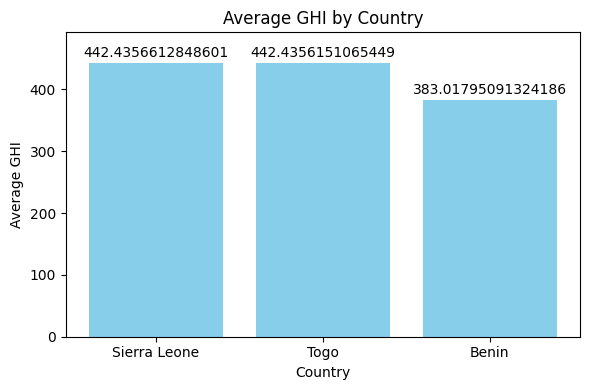

In [12]:


# Sample average GHI values for each country (replace with actual values if needed)
countries = ['Sierra Leone', 'Benin', 'Togo']
average_ghi = [ghi_benin.mean(), ghi_sierra.mean(), ghi_togo.mean()]  # Hypothetical values for illustration

# Sort data for ranking
sorted_data = sorted(zip(countries, average_ghi), key=lambda x: x[1], reverse=True)
sorted_countries, sorted_ghi = zip(*sorted_data)

# Plotting the bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(sorted_countries, sorted_ghi, color='skyblue')
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.ylim(0, max(sorted_ghi) + 50)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{yval}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [13]:
# Step 6: Insight Summary
print("""
Insights:
- Togo and Sierra Leone has almost same average GHI followed by BENIN
- The ANOVA test confirms statistically significant differences in GHI (p < 0.05).
- Boxplots reveal variability and potential outliers, especially in Togo.
- Summary statistics help highlight country-specific solar energy patterns.
""")



Insights:
- Togo and Sierra Leone has almost same average GHI followed by BENIN
- The ANOVA test confirms statistically significant differences in GHI (p < 0.05).
- Boxplots reveal variability and potential outliers, especially in Togo.
- Summary statistics help highlight country-specific solar energy patterns.

